## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data=pd.read_csv('Train/Train.csv')
test_data= pd.read_csv('Test/Test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
pclass       1009 non-null float64
survived     1009 non-null float64
name         1009 non-null object
sex          1009 non-null object
age          812 non-null float64
sibsp        1009 non-null float64
parch        1009 non-null float64
ticket       1009 non-null object
fare         1008 non-null float64
cabin        229 non-null object
embarked     1008 non-null object
boat         374 non-null object
body         98 non-null float64
home.dest    582 non-null object
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
pclass       300 non-null float64
name         300 non-null object
sex          300 non-null object
age          234 non-null float64
sibsp        300 non-null float64
parch        300 non-null float64
ticket       300 non-null object
fare         300 non-null float64
cabin        66 non-null object
embarked     299 non-null object
boat         112 non-null object
body         23 non-null float64
home.dest    163 non-null object
dtypes: float64(6), object(7)
memory usage: 30.6+ KB


In [5]:
columns_to_drop=["name","ticket","cabin","embarked","boat","body","home.dest"]

train_data=train_data.drop(columns_to_drop,axis=1)
test_data=test_data.drop(columns_to_drop,axis=1)

In [6]:
train_data.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,female,NaN,0.0,0.0,7.750
1,2.0,0.0,male,39.0,0.0,0.0,26.000
2,2.0,1.0,female,40.0,0.0,0.0,13.000
3,3.0,1.0,female,31.0,1.0,1.0,20.525
4,3.0,1.0,female,NaN,2.0,0.0,23.250


In [7]:
test_data.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,male,36.0,0.0,0.0,26.3875
1,3.0,female,NaN,8.0,2.0,69.5500
2,1.0,male,NaN,0.0,0.0,50.0000
3,2.0,male,34.0,0.0,0.0,13.0000
4,2.0,male,28.0,0.0,0.0,13.0000


In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train_data["sex"]=le.fit_transform(train_data["sex"])
test_data["sex"]=le.fit_transform(test_data["sex"])

In [9]:
train_data.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,0,NaN,0.0,0.0,7.750
1,2.0,0.0,1,39.0,0.0,0.0,26.000
2,2.0,1.0,0,40.0,0.0,0.0,13.000
3,3.0,1.0,0,31.0,1.0,1.0,20.525
4,3.0,1.0,0,NaN,2.0,0.0,23.250


In [10]:
test_data.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,1,36.0,0.0,0.0,26.3875
1,3.0,0,NaN,8.0,2.0,69.5500
2,1.0,1,NaN,0.0,0.0,50.0000
3,2.0,1,34.0,0.0,0.0,13.0000
4,2.0,1,28.0,0.0,0.0,13.0000


In [11]:
train_data=train_data.fillna(train_data["age"].mean())
test_data=test_data.fillna(test_data["age"].mean())

In [12]:
train_data.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,0,29.838978,0.0,0.0,7.750
1,2.0,0.0,1,39.000000,0.0,0.0,26.000
2,2.0,1.0,0,40.000000,0.0,0.0,13.000
3,3.0,1.0,0,31.000000,1.0,1.0,20.525
4,3.0,1.0,0,29.838978,2.0,0.0,23.250


In [13]:
test_data.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,1,36.000000,0.0,0.0,26.3875
1,3.0,0,30.027422,8.0,2.0,69.5500
2,1.0,1,30.027422,0.0,0.0,50.0000
3,2.0,1,34.000000,0.0,0.0,13.0000
4,2.0,1,28.000000,0.0,0.0,13.0000


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
pclass      1009 non-null float64
survived    1009 non-null float64
sex         1009 non-null int32
age         1009 non-null float64
sibsp       1009 non-null float64
parch       1009 non-null float64
fare        1009 non-null float64
dtypes: float64(6), int32(1)
memory usage: 51.4 KB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
pclass    300 non-null float64
sex       300 non-null int32
age       300 non-null float64
sibsp     300 non-null float64
parch     300 non-null float64
fare      300 non-null float64
dtypes: float64(5), int32(1)
memory usage: 13.0 KB


In [16]:
input_cols=['pclass','sex','age','sibsp','parch','fare']
output_cols=['survived']

X=train_data[input_cols]
Y=train_data[output_cols]

print(X.shape,Y.shape)
print(type(X))

(1009, 6) (1009, 1)
<class 'pandas.core.frame.DataFrame'>


In [17]:
def entropy(col):
    counts = np.unique(col,return_counts=True)
    N=float(col.shape[0])
    
    ent=0.0
    
    for ix in counts[1]:
        p=ix/N
        ent+= (-1.0*p*np.log2(p))
    return ent

In [18]:
def divide_data(x_data,fkey,fval):
    x_right= pd.DataFrame([],columns=x_data.columns)
    x_left= pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val=x_data[fkey].loc[ix]
        
        if val > fval:
            x_right=x_right.append(x_data.loc[ix])
        else:
            x_left=x_left.append(x_data.loc[ix])
    
    return x_left,x_right

In [19]:
x_left,x_right = divide_data(train_data[:10],'sex',0.5)
print(x_left)
print(x_right)

   pclass  survived  sex        age  sibsp  parch     fare
0     3.0       0.0  0.0  29.838978    0.0    0.0   7.7500
2     2.0       1.0  0.0  40.000000    0.0    0.0  13.0000
3     3.0       1.0  0.0  31.000000    1.0    1.0  20.5250
4     3.0       1.0  0.0  29.838978    2.0    0.0  23.2500
7     1.0       1.0  0.0  49.000000    0.0    0.0  25.9292
   pclass  survived  sex        age  sibsp  parch     fare
1     2.0       0.0  1.0  39.000000    0.0    0.0  26.0000
5     2.0       0.0  1.0  16.000000    0.0    0.0  26.0000
6     2.0       0.0  1.0  43.000000    0.0    1.0  21.0000
8     1.0       0.0  1.0  48.000000    0.0    0.0  50.4958
9     2.0       0.0  1.0  29.838978    0.0    0.0  12.8750


In [20]:
def information_gain(x_data,fkey,fval):
    left,right=divide_data(x_data,fkey,fval)
    
    l=float(left.shape[0])/x_data.shape[0]
    r=float(right.shape[0])/x_data.shape[0]
    
    if left.shape[0]==0 or right.shape[0]==0:
        return -1000000 # min information gain
    
    i_gain= entropy(x_data.survived) - (l*entropy(left.survived) + r*entropy(right.survived))
    
    return i_gain

In [21]:
for fx in X.columns:
    print(fx)
    print(information_gain(train_data,fx,train_data[fx].mean()))

pclass
0.055456910002982474
sex
0.19274737190850932
age
0.0010525742338489685
sibsp
0.006492394392888956
parch
0.01975608012294816
fare
0.04242793401428169


In [22]:
class DecesionTree:
    
    #Constructor
    
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.fkey=None
        self.fval=None
        self.target=None
        self.depth=depth
        self.max_depth=max_depth
        
    def train(self,x_data,features):
        info_gain=[]
        
        print(features)
        
        for ix in features:
            i_gain=information_gain(x_data,ix,x_data[ix].mean())
            info_gain.append(i_gain)
        
        self.fkey=features[np.argmax(info_gain)]
        self.fval=x_data[self.fkey].mean()
        print("making tree feature of ",self.fkey)
        
        
        # removing used feature
        features.remove(self.fkey)
        
        
        #Split data
        data_left,data_right=divide_data(x_data,self.fkey,self.fval)
        
        data_left=data_left.reset_index(drop=True)
        data_right=data_right.reset_index(drop=True)
        
        # base cases
        
        #truely single node
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if x_data.survived.mean() >=  0.5:
                self.target = 1
            else:
                self.target = 0
            return
               
        # stop early when depth limit reached or when depth >= max_depth
        if (self.depth >= self.max_depth):
            if x_data.survived.mean() >=  0.5:
                self.target = 1
            else:
                self.target = 0
            return
            
        #recursive case
        self.left=DecesionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left,features.copy())
        self.right=DecesionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right,features.copy())
        
        # you can set the target at every node
        
        if x_data.survived.mean() >= 0.5:
            self.target = 1
        else:
            self.target = 0
        
        return
    
    
    def predict(self,test):
        
        if test[self.fkey] > self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)
    
    

In [23]:
print(train_data.shape,test_data.shape)

(1009, 7) (300, 6)


In [24]:
dt = DecesionTree()

In [25]:
dt.train(train_data,input_cols.copy())

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
making tree feature of  sex
['pclass', 'age', 'sibsp', 'parch', 'fare']
making tree feature of  pclass
['age', 'sibsp', 'parch', 'fare']
making tree feature of  fare
['age', 'sibsp', 'parch']
making tree feature of  parch
['age', 'sibsp']
making tree feature of  sibsp
['age']
making tree feature of  age
['age']
making tree feature of  age
['age', 'sibsp']
making tree feature of  sibsp
['age']
making tree feature of  age
['age']
making tree feature of  age
['age', 'sibsp', 'parch']
making tree feature of  sibsp
['age', 'parch']
making tree feature of  age
['parch']
making tree feature of  parch
['parch']
making tree feature of  parch
['age', 'parch']
making tree feature of  parch
['age']
making tree feature of  age
['age']
making tree feature of  age
['age', 'sibsp', 'parch', 'fare']
making tree feature of  parch
['age', 'sibsp', 'fare']
making tree feature of  sibsp
['age', 'fare']
making tree feature of  fare
['age']
making tree featu

In [26]:
y_pred=[]
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [27]:
df=pd.DataFrame(data=y_pred,columns=['survived'])

In [49]:
df.to_csv('y_predicted_using_decession_tree.csv',index_label='Id')

# decesion tree using sklearn

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# we can also use criterian='gini' same as entropy to classify
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5) 

In [30]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
y_predict_using_sklearn=sk_tree.predict(test_data)

In [32]:
y_predict_using_sklearn

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0.

In [33]:
df_sklearn=pd.DataFrame(data=y_predict_using_sklearn,columns=['survived'])

In [56]:
df_sklearn.to_csv('y_predicted_sklearn_decession_tree.csv',index_label='Id')

# visualise a decesion tree

In [34]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [35]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

In [36]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# using random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [40]:
rf.fit(train_data[input_cols],train_data[output_cols])

C:\Users\yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
rf.score(train_data[input_cols],train_data[output_cols])

0.8354806739345887

In [44]:
from sklearn.model_selection import cross_val_score
acc= cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=5,criterion='entropy'),train_data[input_cols],train_data[output_cols],cv=5).mean()

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

In [45]:
print(acc)

0.8077004141852315


In [46]:
acc_list=[]
for i in range(1,50):
    acc=cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5,criterion='entropy'),train_data[input_cols],train_data[output_cols],cv=5).mean()
    acc_list.append(acc)

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yash\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [47]:
print(acc_list)

[0.7550229149817416, 0.7780163223292406, 0.7949219420140677, 0.7909026297085999, 0.7928534666568634, 0.7928338602553733, 0.7978874102394432, 0.7989118447173003, 0.7939073107369556, 0.7918584417812415, 0.8068230277185503, 0.7988138127098497, 0.7929024826605887, 0.8057593804377129, 0.8037889370879592, 0.8047349459598558, 0.8038183466901943, 0.7978089846334828, 0.8007940592603486, 0.796843369360096, 0.7978383942357179, 0.7958581476852192, 0.796843369360096, 0.8047741587628361, 0.8087640614660687, 0.7949023356125775, 0.7958483444844742, 0.7998186407862167, 0.8027841090115923, 0.7899076048329781, 0.806793618116315, 0.806793618116315, 0.7968335661593511, 0.7958679508859643, 0.7958483444844742, 0.8067642085140798, 0.8018184937382056, 0.8048133715658162, 0.804764355562091, 0.7988236159105948, 0.7988628287135751, 0.8008136656618386, 0.8097884959439258, 0.7998480503884519, 0.7948925324118324, 0.7988432223120848, 0.8067740117148249, 0.8018282969389505, 0.7958483444844742]


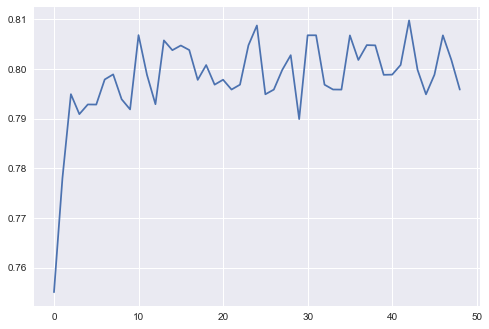

In [49]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)
plt.show()

In [50]:
print(np.argmax(acc_list))

42


In [51]:
rf=RandomForestClassifier(n_estimators=43,max_depth=5,criterion='entropy')
rf.fit(train_data[input_cols],train_data[output_cols])

C:\Users\yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=43,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
rf.score(train_data[input_cols],train_data[output_cols])

0.8315163528245788

In [54]:
y_prediction_random_forest=rf.predict(test_data)

In [55]:
df_random_sklearn=pd.DataFrame(data=y_predict_using_sklearn,columns=['survived'])

In [57]:
df_random_sklearn.to_csv('y_predicted_sklearn_random_forest.csv',index_label='Id')